# Pandas - 2

In [71]:
import pandas as pd

Данные отсюда - <a href='https://www.kaggle.com/datasets/odartey/top-chess-players'>Kaggle</a>

### В предыдущих сериях:

In [72]:
# Первая строчка - заголовок, можем еще указать разделитель 
# и пропустить несколько первых строк
pd.read_csv('fide_historical.csv', sep = ',')

,ranking_date,rank,name,title,country,rating,games,birth_year
0,27-07-00,1,"Kasparov, Garry",g,RUS,2849,35,1963
1,27-07-00,2,"Kramnik, Vladimir",g,RUS,2770,23,1975
2,27-07-00,3,"Anand, Viswanathan",g,IND,2762,23,1969
3,27-07-00,4,"Morozevich, Alexander",g,RUS,2756,28,1977
4,27-07-00,5,"Adams, Michael",g,ENG,2755,38,1971
...,...,...,...,...,...,...,...,...
11506,27-06-17,96,"Safarli, Eltaj",g,AZE,2656,9,1992
11507,27-06-17,97,"Shirov, Alexei",g,LAT,2656,9,1972
11508,27-06-17,98,"Granda Zuniga, Julio E",g,PER,2656,4,1967
11509,27-06-17,99,"Robson, Ray",g,USA,2656,0,1994


In [73]:
fide_historical = pd.read_csv('fide_historical.csv')

#### Посмотреть несколько строк можно командами head, tail и sample

In [74]:
# Первые строки
fide_historical.head()

,ranking_date,rank,name,title,country,rating,games,birth_year
0,27-07-00,1,"Kasparov, Garry",g,RUS,2849,35,1963
1,27-07-00,2,"Kramnik, Vladimir",g,RUS,2770,23,1975
2,27-07-00,3,"Anand, Viswanathan",g,IND,2762,23,1969
3,27-07-00,4,"Morozevich, Alexander",g,RUS,2756,28,1977
4,27-07-00,5,"Adams, Michael",g,ENG,2755,38,1971


In [75]:
fide_historical.loc[10:15,'rank':'title']

,rank,name,title
10,11,"Bareev, Evgeny",g
11,12,"Karpov, Anatoly",g
12,13,"Kasimdzhanov, Rustam",g
13,14,"Svidler, Peter",g
14,15,"Gelfand, Boris",g
15,16,"Short, Nigel D.",g


In [76]:
fide_historical.columns

Index(['ranking_date', 'rank', 'name', 'title', 'country', 'rating', 'games',
       'birth_year'],
      dtype='object')

In [77]:
fide_historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11511 entries, 0 to 11510
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ranking_date  11511 non-null  object
 1   rank          11511 non-null  int64 
 2   name          11511 non-null  object
 3   title         11511 non-null  object
 4   country       11511 non-null  object
 5   rating        11511 non-null  int64 
 6   games         11511 non-null  int64 
 7   birth_year    11511 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 719.6+ KB


In [78]:
fide_historical['ranking_datetime'] = pd.to_datetime(fide_historical['ranking_date'])

In [79]:
fide_historical['ranking_date'] = pd.to_datetime(fide_historical['ranking_date'])

In [80]:
fide_historical['rating'] = fide_historical['rating'].astype('float')

In [ ]:
fide_historical.info()

#### Векторное представление и операции. Создание новой колонки

In [81]:
fide_historical['name_title'] = fide_historical['name'].astype('str') + ', ' + fide_historical['title'].astype('str')

In [82]:
fide_historical['ratio_per_game'] = fide_historical.rating/fide_historical.games

#### Удаление колонок

In [83]:
fide_historical.drop('ranking_date', axis=1, inplace = True)

In [84]:
fide_historical = fide_historical.drop(['name', 'title'], axis=1)

#### Выгрузить результат можно с помощью команд .to_csv(), .to_excel()

In [ ]:
fide_historical[fide_historical.ratio_per_game > 250].to_csv('test.csv', index = False)

### Фильтрация

In [85]:
fide_historical.ratio_per_game > 250

0        False
1        False
2        False
3        False
4        False
         ...  
11506     True
11507     True
11508     True
11509     True
11510     True
Name: ratio_per_game, Length: 11511, dtype: bool

In [86]:
fide_historical[fide_historical.ratio_per_game > 250]

,rank,country,rating,games,birth_year,ranking_datetime,name_title,ratio_per_game
7,8,UKR,2719.0,10,1969,2000-07-27,"Ivanchuk, Vassily, g",271.900000
13,14,RUS,2689.0,9,1976,2000-07-27,"Svidler, Peter, g",298.777778
18,19,GEO,2673.0,0,1960,2000-07-27,"Azmaiparashvili, Zurab, g",inf
37,38,RUS,2644.0,0,1964,2000-07-27,"Salov, Valery, g",inf
39,40,USA,2643.0,9,1947,2000-07-27,"Gulko, Boris F, g",293.666667
...,...,...,...,...,...,...,...,...
11506,96,AZE,2656.0,9,1992,2017-06-27,"Safarli, Eltaj, g",295.111111
11507,97,LAT,2656.0,9,1972,2017-06-27,"Shirov, Alexei, g",295.111111
11508,98,PER,2656.0,4,1967,2017-06-27,"Granda Zuniga, Julio E, g",664.000000
11509,99,USA,2656.0,0,1994,2017-06-27,"Robson, Ray, g",inf


In [87]:
(fide_historical.ratio_per_game > 250) & (fide_historical.country == 'RUS')

0        False
1        False
2        False
3        False
4        False
         ...  
11506    False
11507    False
11508    False
11509    False
11510    False
Length: 11511, dtype: bool

In [92]:
fide_historical[(fide_historical.ratio_per_game > 250) & (fide_historical.country == 'RUS')]

,rank,country,rating,games,birth_year,ranking_datetime,name_title,ratio_per_game
13,14,RUS,2689.0,9,1976,2000-07-27,"Svidler, Peter, g",298.777778
37,38,RUS,2644.0,0,1964,2000-07-27,"Salov, Valery, g",inf
44,45,RUS,2640.0,0,1966,2000-07-27,"Shipov, Sergei, g",inf
63,64,RUS,2619.0,0,1969,2000-07-27,"Korneev, Oleg, g",inf
83,84,RUS,2605.0,8,1958,2000-07-27,"Smagin, Sergey, g",325.625000
...,...,...,...,...,...,...,...,...
11473,63,RUS,2683.0,6,1974,2017-06-27,"Rublevsky, Sergei, g",447.166667
11479,69,RUS,2676.0,0,1989,2017-06-27,"Rakhmanov, Aleksandr, g",inf
11484,74,RUS,2675.0,0,1977,2017-06-27,"Morozevich, Alexander, g",inf
11489,79,RUS,2672.0,7,1979,2017-06-27,"Motylev, Alexander, g",381.714286


In [93]:
import numpy as np

In [98]:
np.inf

inf

In [101]:
np.isfinite(fide_historical.ratio_per_game)

0         True
1         True
2         True
3         True
4         True
         ...  
11506     True
11507     True
11508     True
11509    False
11510     True
Name: ratio_per_game, Length: 11511, dtype: bool

In [105]:
fide_historical[(fide_historical.ratio_per_game == np.inf) & (fide_historical.country == 'RUS')]


,rank,country,rating,games,birth_year,ranking_datetime,name_title,ratio_per_game
37,38,RUS,2644.0,0,1964,2000-07-27,"Salov, Valery, g",inf
44,45,RUS,2640.0,0,1966,2000-07-27,"Shipov, Sergei, g",inf
63,64,RUS,2619.0,0,1969,2000-07-27,"Korneev, Oleg, g",inf
100,1,RUS,2849.0,0,1963,2000-10-27,"Kasparov, Garry, g",inf
110,11,RUS,2699.0,0,1951,2000-10-27,"Karpov, Anatoly, g",inf
...,...,...,...,...,...,...,...,...
11401,94,RUS,2660.0,0,1996,2017-05-27,"Dubov, Daniil, g",inf
11404,97,RUS,2658.0,0,1986,2017-05-27,"Grachev, Boris, g",inf
11410,103,RUS,2654.0,0,1993,2017-05-27,"Sjugirov, Sanan, g",inf
11479,69,RUS,2676.0,0,1989,2017-06-27,"Rakhmanov, Aleksandr, g",inf


In [103]:
fide_historical[np.isfinite(fide_historical.ratio_per_game) & (fide_historical.country == 'RUS')]

,rank,country,rating,games,birth_year,ranking_datetime,name_title,ratio_per_game
0,1,RUS,2849.0,35,1963,2000-07-27,"Kasparov, Garry, g",81.400000
1,2,RUS,2770.0,23,1975,2000-07-27,"Kramnik, Vladimir, g",120.434783
3,4,RUS,2756.0,28,1977,2000-07-27,"Morozevich, Alexander, g",98.428571
10,11,RUS,2702.0,17,1966,2000-07-27,"Bareev, Evgeny, g",158.941176
11,12,RUS,2699.0,11,1951,2000-07-27,"Karpov, Anatoly, g",245.363636
...,...,...,...,...,...,...,...,...
11457,47,RUS,2703.0,7,1995,2017-06-27,"Fedoseev, Vladimir, g",386.142857
11464,54,RUS,2691.0,7,1998,2017-06-27,"Artemiev, Vladislav, g",384.428571
11473,63,RUS,2683.0,6,1974,2017-06-27,"Rublevsky, Sergei, g",447.166667
11489,79,RUS,2672.0,7,1979,2017-06-27,"Motylev, Alexander, g",381.714286


#### Группировка данных

In [106]:
fide_historical.head()

,rank,country,rating,games,birth_year,ranking_datetime,name_title,ratio_per_game
0,1,RUS,2849.0,35,1963,2000-07-27,"Kasparov, Garry, g",81.400000
1,2,RUS,2770.0,23,1975,2000-07-27,"Kramnik, Vladimir, g",120.434783
2,3,IND,2762.0,23,1969,2000-07-27,"Anand, Viswanathan, g",120.086957
3,4,RUS,2756.0,28,1977,2000-07-27,"Morozevich, Alexander, g",98.428571
4,5,ENG,2755.0,38,1971,2000-07-27,"Adams, Michael, g",72.500000


In [108]:
type(fide_historical)

pandas.core.frame.DataFrame

In [109]:
type(fide_historical.groupby('rank'))

pandas.core.groupby.generic.DataFrameGroupBy

In [110]:
fide_historical.groupby('rank').count()

,country,rating,games,birth_year,ranking_datetime,name_title,ratio_per_game
rank,,,,,,,
1,114,114,114,114,114,114,114
2,114,114,114,114,114,114,114
3,114,114,114,114,114,114,114
4,114,114,114,114,114,114,114
5,114,114,114,114,114,114,114
...,...,...,...,...,...,...,...
101,64,64,64,64,64,64,64
102,28,28,28,28,28,28,28
103,12,12,12,12,12,12,12


In [111]:
fide_historical.groupby('rank')['name_title'].count()

rank
1      114
2      114
3      114
4      114
5      114
      ... 
101     64
102     28
103     12
104      6
105      1
Name: name_title, Length: 105, dtype: int64

In [112]:
fide_historical.groupby('rank')['country'].unique()

rank
1                                   [RUS, BUL, IND, NOR]
2          [RUS, IND, BUL, UKR, NOR, ARM, ITA, USA, FRA]
3      [IND, RUS, BUL, ARM, UKR, NOR, ITA, USA, NED, ...
4      [RUS, ENG, BUL, HUN, AZE, UKR, NOR, ARM, IND, ...
5      [ENG, HUN, RUS, BUL, ESP, UKR, ARM, NOR, IND, ...
                             ...                        
101    [RUS, USA, EST, KAZ, GER, PHI, TUR, UKR, ROU, ...
102    [USA, BLR, UKR, ARM, CHN, BRA, RUS, SRB, GER, ...
103             [ENG, RUS, USA, IND, HUN, ISR, SUI, CZE]
104                       [ENG, UKR, RUS, BIH, GER, IND]
105                                                [ENG]
Name: country, Length: 105, dtype: object

In [115]:
fide_historical.groupby(['rank', 'country'])['name_title'].count()

rank  country
1     BUL        10
      IND         8
      NOR        72
      RUS        24
2     ARM        26
                 ..
104   GER         1
      IND         1
      RUS         1
      UKR         1
105   ENG         1
Name: name_title, Length: 2666, dtype: int64

In [114]:
fide_historical.groupby(['country', 'rank']).count()

rating  games  birth_year  ranking_datetime  name_title  \
country rank                                                            
ARG     86         1      1           1                 1           1   
        89         2      2           2                 2           2   
        94         1      1           1                 1           1   
ARM     2         26     26          26                26          26   
        3         14     14          14                14          14   
...              ...    ...         ...               ...         ...   
VIE     92         2      2           2                 2           2   
        93         2      2           2                 2           2   
        94         1      1           1                 1           1   
        99         1      1           1                 1           1   
        100        1      1           1                 1           1   

              ratio_per_game  
country rank                  
ARG     86                 1  
        89                 2  
        94                 1  
ARM     2                 26  
        3                 14  
...                      ...  
VIE     92                 2  
        93                 2  
        94                 1  
        99                 1  
        100                1  

[2666 rows x 6 columns]

In [116]:
fide_historical.groupby(['rank', 'country'])['name_title'].unique()

rank  country
1     BUL                                    [Topalov, Veselin, g]
      IND                                  [Anand, Viswanathan, g]
      NOR                                     [Carlsen, Magnus, g]
      RUS        [Kasparov, Garry, g, Kasparov, Gary, g, Kramni...
2     ARM                                      [Aronian, Levon, g]
                                       ...                        
104   GER                                        [Meier, Georg, g]
      IND                                     [Gupta, Abhijeet, g]
      RUS                                    [Timofeev, Artyom, g]
      UKR                                 [Eingorn, Vereslav S, g]
105   ENG                                  [Hodgson, Julian M., g]
Name: name_title, Length: 2666, dtype: object

In [118]:
fide_historical.groupby('country')['rank'].agg('mean')

country
ARG    89.500000
ARM    51.626327
AUT    69.464286
AZE    36.775910
BEL    51.814815
         ...    
UKR    48.197452
USA    50.369202
UZB    45.336000
VEN    91.058824
VIE    50.358696
Name: rank, Length: 64, dtype: float64

In [117]:
fide_historical.groupby('country')['rating'].agg('mean')

country
ARG    2641.250000
ARM    2692.131635
AUT    2675.053571
AZE    2712.938375
BEL    2643.444444
          ...     
UKR    2691.381104
USA    2693.526902
UZB    2686.944000
VEN    2658.529412
VIE    2695.565217
Name: rating, Length: 64, dtype: float64

In [122]:
fide_historical.head()

,rank,country,rating,games,birth_year,ranking_datetime,name_title,ratio_per_game
0,1,RUS,2849.0,35,1963,2000-07-27,"Kasparov, Garry, g",81.400000
1,2,RUS,2770.0,23,1975,2000-07-27,"Kramnik, Vladimir, g",120.434783
2,3,IND,2762.0,23,1969,2000-07-27,"Anand, Viswanathan, g",120.086957
3,4,RUS,2756.0,28,1977,2000-07-27,"Morozevich, Alexander, g",98.428571
4,5,ENG,2755.0,38,1971,2000-07-27,"Adams, Michael, g",72.500000


In [119]:
fide_historical.groupby('country')['rating'].agg(['mean', 'median', 'sum', 'count'])

,mean,median,sum,count
country,,,,
ARG,2641.250000,2641.5,10565.0,4
ARM,2692.131635,2676.0,1267994.0,471
AUT,2675.053571,2676.5,149803.0,56
AZE,2712.938375,2724.0,968519.0,357
BEL,2643.444444,2641.0,71373.0,27
...,...,...,...,...
UKR,2691.381104,2694.0,2535281.0,942
USA,2693.526902,2673.0,1451811.0,539
UZB,2686.944000,2693.0,335868.0,125


In [121]:
fide_historical.groupby('country')['rating'].agg('mean').sort_values('rating')

ValueError: No axis named rating for object type Series

In [123]:
fide_historical.groupby('country')['rating'].agg('mean').reset_index()

,country,rating
0,ARG,2641.250000
1,ARM,2692.131635
2,AUT,2675.053571
3,AZE,2712.938375
4,BEL,2643.444444
...,...,...
59,UKR,2691.381104
60,USA,2693.526902
61,UZB,2686.944000
62,VEN,2658.529412


In [127]:
fide_historical.groupby('country')['rating'].agg('mean').reset_index().sort_values('rating', ascending = False)

,country,rating
40,NOR,2807.579439
32,ITA,2755.631579
3,AZE,2712.938375
8,BUL,2711.078571
27,IND,2708.790361
...,...,...
13,CYP,2616.500000
35,LTU,2613.100000
36,MAR,2610.000000
29,IRL,2598.000000


### Задание 1 - посчитайте средний рейтинг каждому спортсмену и сохраните файл как csv

In [128]:
fide_historical.columns

Index(['rank', 'country', 'rating', 'games', 'birth_year', 'ranking_datetime',
       'name_title', 'ratio_per_game'],
      dtype='object')

In [129]:
fide_historical.groupby('name_title')['rating'].agg('mean').to_csv('fide_historical_task_1.csv')

In [ ]:
fide_historical.groupby('country')['rank'].agg('mean').reset_index().sort_values('rank', ascending = False)

### Задание 2  - посчитайте среднее значение рейтинга по каждой версии рейтинга (версия рейтинга: шахматисты от 1 до 100 каждый ranking_datetime

In [133]:
fide_historical.groupby('ranking_datetime')['rating'].agg('mean').reset_index()

,ranking_datetime,rating
0,2000-07-27,2643.550000
1,2000-10-27,2643.580000
2,2001-01-27,2646.670000
3,2001-04-27,2646.090000
4,2001-07-27,2645.040000
...,...,...
109,2017-02-27,2704.237624
110,2017-03-27,2704.890000
111,2017-04-27,2705.425743
112,2017-05-27,2704.116505


### Merge, concat

In [134]:
fide_historical.head(3)

,rank,country,rating,games,birth_year,ranking_datetime,name_title,ratio_per_game
0,1,RUS,2849.0,35,1963,2000-07-27,"Kasparov, Garry, g",81.400000
1,2,RUS,2770.0,23,1975,2000-07-27,"Kramnik, Vladimir, g",120.434783
2,3,IND,2762.0,23,1969,2000-07-27,"Anand, Viswanathan, g",120.086957


In [138]:
fide_historical_10 = fide_historical[fide_historical.ranking_datetime == '2000-07-27']

In [139]:
fide_historical_last = fide_historical[fide_historical.ranking_datetime == '2017-06-27']

In [140]:
fide_historical_last

,rank,country,rating,games,birth_year,ranking_datetime,name_title,ratio_per_game
11411,1,NOR,2832.0,0,1990,2017-06-27,"Carlsen, Magnus, g",inf
11412,2,USA,2812.0,9,1993,2017-06-27,"So, Wesley, g",312.444444
11413,3,RUS,2808.0,13,1975,2017-06-27,"Kramnik, Vladimir, g",216.000000
11414,4,USA,2808.0,2,1992,2017-06-27,"Caruana, Fabiano, g",1404.000000
11415,5,AZE,2800.0,22,1985,2017-06-27,"Mamedyarov, Shakhriyar, g",127.272727
...,...,...,...,...,...,...,...,...
11506,96,AZE,2656.0,9,1992,2017-06-27,"Safarli, Eltaj, g",295.111111
11507,97,LAT,2656.0,9,1972,2017-06-27,"Shirov, Alexei, g",295.111111
11508,98,PER,2656.0,4,1967,2017-06-27,"Granda Zuniga, Julio E, g",664.000000
11509,99,USA,2656.0,0,1994,2017-06-27,"Robson, Ray, g",inf


#### Если хотим дополнить  один датафрейм в другой  - нужен concat

In [142]:
pd.concat([fide_historical_10, fide_historical_last])

,rank,country,rating,games,birth_year,ranking_datetime,name_title,ratio_per_game
0,1,RUS,2849.0,35,1963,2000-07-27,"Kasparov, Garry, g",81.400000
1,2,RUS,2770.0,23,1975,2000-07-27,"Kramnik, Vladimir, g",120.434783
2,3,IND,2762.0,23,1969,2000-07-27,"Anand, Viswanathan, g",120.086957
3,4,RUS,2756.0,28,1977,2000-07-27,"Morozevich, Alexander, g",98.428571
4,5,ENG,2755.0,38,1971,2000-07-27,"Adams, Michael, g",72.500000
...,...,...,...,...,...,...,...,...
11506,96,AZE,2656.0,9,1992,2017-06-27,"Safarli, Eltaj, g",295.111111
11507,97,LAT,2656.0,9,1972,2017-06-27,"Shirov, Alexei, g",295.111111
11508,98,PER,2656.0,4,1967,2017-06-27,"Granda Zuniga, Julio E, g",664.000000
11509,99,USA,2656.0,0,1994,2017-06-27,"Robson, Ray, g",inf


In [144]:
pd.concat([fide_historical_10, fide_historical_last]).reset_index().drop('index', axis = 1)

,rank,country,rating,games,birth_year,ranking_datetime,name_title,ratio_per_game
0,1,RUS,2849.0,35,1963,2000-07-27,"Kasparov, Garry, g",81.400000
1,2,RUS,2770.0,23,1975,2000-07-27,"Kramnik, Vladimir, g",120.434783
2,3,IND,2762.0,23,1969,2000-07-27,"Anand, Viswanathan, g",120.086957
3,4,RUS,2756.0,28,1977,2000-07-27,"Morozevich, Alexander, g",98.428571
4,5,ENG,2755.0,38,1971,2000-07-27,"Adams, Michael, g",72.500000
...,...,...,...,...,...,...,...,...
195,96,AZE,2656.0,9,1992,2017-06-27,"Safarli, Eltaj, g",295.111111
196,97,LAT,2656.0,9,1972,2017-06-27,"Shirov, Alexei, g",295.111111
197,98,PER,2656.0,4,1967,2017-06-27,"Granda Zuniga, Julio E, g",664.000000
198,99,USA,2656.0,0,1994,2017-06-27,"Robson, Ray, g",inf


### Если хотим соединить какой-то датафрейм по ключу с другим - поможет merge

#### Создайте датафрейм с максимальным rating для каждой страны

In [145]:
fide_historical.groupby('country')['rating'].agg('max').reset_index()

,country,rating
0,ARG,2664.0
1,ARM,2830.0
2,AUT,2703.0
3,AZE,2800.0
4,BEL,2694.0
...,...,...
59,UKR,2787.0
60,USA,2827.0
61,UZB,2715.0
62,VEN,2673.0


In [146]:
fide_historical_max_per_country = fide_historical.groupby('country')['rating'].agg('max').reset_index()

In [147]:
fide_historical_max_per_country

,country,rating
0,ARG,2664.0
1,ARM,2830.0
2,AUT,2703.0
3,AZE,2800.0
4,BEL,2694.0
...,...,...
59,UKR,2787.0
60,USA,2827.0
61,UZB,2715.0
62,VEN,2673.0


In [148]:
fide_historical_max_per_country.columns

Index(['country', 'rating'], dtype='object')

In [156]:
fide_historical_max_per_country.columns = ['country', 'max_rating']

In [157]:
fide_historical_max_per_country

,country,max_rating
0,ARG,2664.0
1,ARM,2830.0
2,AUT,2703.0
3,AZE,2800.0
4,BEL,2694.0
...,...,...
59,UKR,2787.0
60,USA,2827.0
61,UZB,2715.0
62,VEN,2673.0


In [159]:
pd.merge(fide_historical, fide_historical_max_per_country, how = 'left', left_on = 'country', right_on = 'country')

,rank,country,rating,games,birth_year,ranking_datetime,name_title,ratio_per_game,max_rating
0,1,RUS,2849.0,35,1963,2000-07-27,"Kasparov, Garry, g",81.400000,2849.0
1,2,RUS,2770.0,23,1975,2000-07-27,"Kramnik, Vladimir, g",120.434783,2849.0
2,3,IND,2762.0,23,1969,2000-07-27,"Anand, Viswanathan, g",120.086957,2817.0
3,4,RUS,2756.0,28,1977,2000-07-27,"Morozevich, Alexander, g",98.428571,2849.0
4,5,ENG,2755.0,38,1971,2000-07-27,"Adams, Michael, g",72.500000,2761.0
...,...,...,...,...,...,...,...,...,...
11506,96,AZE,2656.0,9,1992,2017-06-27,"Safarli, Eltaj, g",295.111111,2800.0
11507,97,LAT,2656.0,9,1972,2017-06-27,"Shirov, Alexei, g",295.111111,2718.0
11508,98,PER,2656.0,4,1967,2017-06-27,"Granda Zuniga, Julio E, g",664.000000,2699.0
11509,99,USA,2656.0,0,1994,2017-06-27,"Robson, Ray, g",inf,2827.0


### Графики

#### Вывести все вхождения в рейтинг (дата рейтинга и rating) для Гарри Каспарова

In [166]:
fide_historical[fide_historical['name_title'].str.contains('Kasparov')]['name_title'].unique()

array(['Kasparov, Garry, g', 'Kasparov, Gary, g'], dtype=object)

In [168]:
garry = fide_historical[(fide_historical['name_title'] == 'Kasparov, Garry, g') | (fide_historical['name_title'] == 'Kasparov, Gary, g')].loc[:, ['ranking_datetime', 'rating']]

In [171]:
garry.columns

Index(['ranking_datetime', 'rating'], dtype='object')

<AxesSubplot:xlabel='ranking_datetime'>

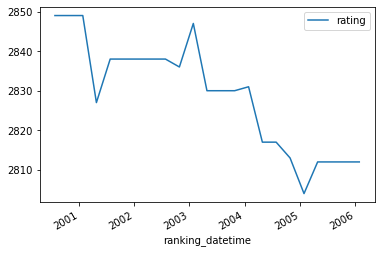

In [172]:
garry.plot(x='ranking_datetime', y='rating')

<AxesSubplot:ylabel='Frequency'>

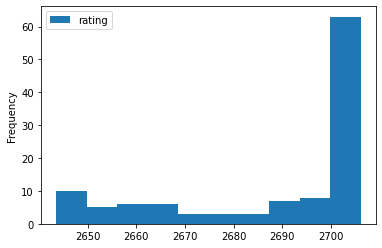

In [176]:
fide_historical.groupby('ranking_datetime')['rating'].agg('mean').reset_index().plot(kind='hist', x='ranking_datetime', y='rating')

<AxesSubplot:xlabel='ranking_datetime', ylabel='rating'>

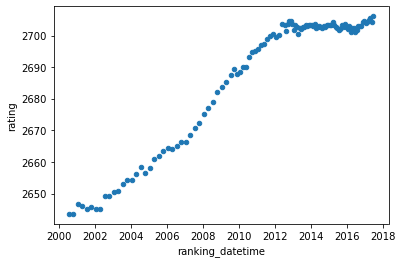

In [177]:
fide_historical.groupby('ranking_datetime')['rating'].agg('mean').reset_index().plot(kind='scatter', x='ranking_datetime', y='rating')